In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
saturation = pd.read_csv('o2Saturation.csv')
saturation

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [12]:
heart.shape

(303, 14)

In [13]:
# age/ sex/ cp:胸部痛/ trtbps: 安静時（収縮期？）/ chol:血中コレステロール（BMIセンサーによって計測?）/ fbs: 空腹時血糖/ restecg: 安静時心電図結果/ thalachh: 最大心拍数/ exng	oldpeak: 運動誘発狭心症/ slp: caa: 間動脈瘤	thall	output
heart.shape(303, 14)

TypeError: 'tuple' object is not callable

In [ ]:
heart.describe()

In [ ]:
heart.info()

In [ ]:
heart.isnull().sum()

In [ ]:
heart['output'].value_counts()

In [ ]:
sns.countplot(x =heart['output'], data = heart )

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(x = heart['age'])
plt.title('Age to Count Plot', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)


In [ ]:
plt.hist(heart['age'], bins = 10)

In [ ]:
heart.corr()

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(heart.corr(), annot = True, linewidth = .8, cmap = 'Blues')

In [ ]:
# Categorical = heart.['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Categorical = heart.drop(['age',  'trtbps',  'chol',  'thalachh', 'oldpeak'], axis = 1)
Numerical = heart[['age',  'trtbps',  'chol',  'thalachh', 'oldpeak', 'output']]

In [ ]:
for i in range(Categorical.shape[1]):
    sns.catplot(x = Categorical.columns[i], data = heart, kind = 'count', hue = 'output')


In [ ]:
for i in range(Numerical.shape[1]):
    sns.catplot(x = 'output', y = Numerical.columns[i], data = Numerical, kind = 'box')

In [ ]:
chest_pain_count = heart['cp'].value_counts().reset_index()
chest_pain_count

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = chest_pain_count['index'], y = chest_pain_count['cp'])
plt.title('TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS', fontsize = 20)

In [ ]:
heart['trtbps'].value_counts()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
sns.displot(heart['trtbps'])
plt.title('DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS', fontsize = 18)
plt.xlabel('BLOOD PRESSURE', fontsize=20)
plt.ylabel('COUNT', fontsize = 20)

In [ ]:
sns.displot(heart['age'])

In [ ]:
# Cholestrol distribution vs patients count
plt.figure(figsize=(20, 10))
sns.displot(x = heart['chol'], data = heart)
plt.title('DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS')
plt.xlabel('CHOLESTROL LEVEL', fontsize=20)
plt.ylabel('COUNT', fontsize=20)

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(x=heart['thalachh'], data = heart)
plt.title('DISTRIBUTION OF HEART RATE AMONG PATIENTS')
plt.xlabel('HEART RATE', fontsize=20)
plt.ylabel('COUNT', fontsize=20)

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot( x = heart['age'], data = heart,  hue='output')
plt.title("AGE EFFECT ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Figure size 1440x720 with 0 Axes>

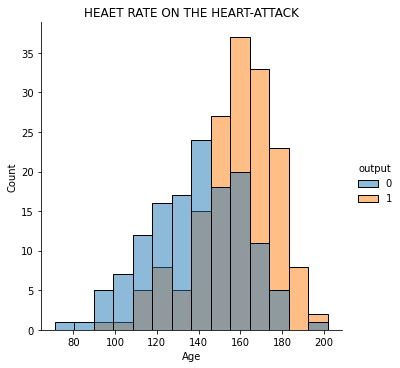

In [14]:
plt.figure(figsize=(20, 10))
sns.displot( x = heart['thalachh'], data = heart,  hue='output')
plt.title("HEAET RATE ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Figure size 1440x720 with 0 Axes>

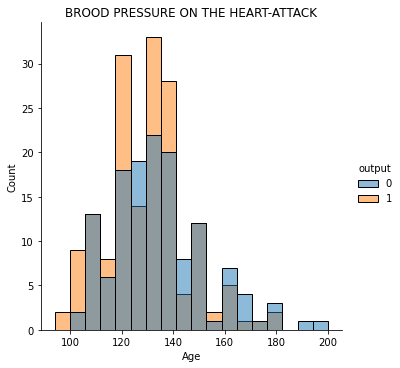

In [15]:
plt.figure(figsize=(20, 10))
sns.displot( x = heart['trtbps'], data = heart,  hue='output')
plt.title("BROOD PRESSURE ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [16]:
# ダブりの確認
heart.drop_duplicates(inplace=True)
heart.reset_index(drop=True, inplace=True)

In [17]:
X = heart.drop('output', axis=1)
y = heart['output']

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: output, Length: 302, dtype: int64

In [19]:
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [124]:
accuracy_scores = {}
def predictor(predictor, params):
    global accuracy_scores
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)
    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set')
        from sklearn.svm import SVC
        classifier = SVC(**params)
    elif predictor == 'knn':
        print('TrainingK-Nearest Neighbours on Training Set')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)
    elif predictor == 'dt':
        print('Training Decision Tree Classifier on Training Set')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)
    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)
    elif predictor == 'rfc':
        print('training Random Forest Classifier on Training Set')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)
        
    classifier.fit(X_train, y_train)
    
    print('''Predicting Single Cell Result（1行目の結果）''')
    single_predict = classifier.predict(sc.transform([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))
    if single_predict > 0.5:
        print('Heart Attack\n')
    else:
        print('No Heart Attack \n')
        
    print(''' Predicting Test Set Result''')
    y_pred = classifier.predict(X_test)
    result = np.concatenate((np.array(y_pred).reshape(len(y_pred), 1),
                             np.array(y_test).reshape(len(y_test), 1)), 1)
#     concatenate: ndarrayを連結させる（numpy)
# reshape(len(y_pred), 1): 縦1列に並べようとしている

    print(result, '\n')
    
    print('''Making Confusion Matrix''')
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(np.rot90(cm, 2), index=["actual_Positive", "actual_Negative"], columns=["predict_Positive", "predict_Negative"])
    print(df_cm)
    print(cm, '\n')
    print('True Positives :', cm[1][1])
    print('False Positives:', cm[0][1])
    print('Flase Negatives:', cm[1][0])
    print('True Negatives:', cm[0][0], '\n')
    
    print('''Classification Report''')
    print(classification_report(y_test, y_pred, target_names=['0', '1'], zero_division=1))
    print('precision = TP/ TP + FP: 疾患ありと診断された群で疾患がある割合')
    print('recall = TP/ TP + FN: 疾患がある群で疾患ありと診断された割合')
    print('F値 = 2 * precision * recall / precision + recall')
    print('support: 正解データに含まれている個数')
    print('macro : クラス別の値を平均した結果')
    print('weights：クラス別の値の重み付け平均', '\n')
#     classification_report: 適合率、再現率、F値、個数を算出（表にする）

    print('Evaluating Model Performance')
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, '\n')
    print('accuracy: TP + TN / 全体 = 正解率')
    
    print('''Applying K-Fold Cross balidation''')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y= y_train, cv=10)
    print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print('Standard Deviation:{:.2f}%'.format(accuracies.std()), '\n')
#     なぜstdを表示している？

In [103]:
# Training Logistic Regression on Training Set

predictor('lr', {'penalty':'l1', 'solver':'liblinear'})
#solver（最適化手法）は l1とl2で適合できるものが違う

Training Logistic Regression on Training Set
Predicting Single Cell Result（1行目の結果）
Heart Attack

 Predicting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                29                 3
actual_Negative                 9                20
[[20  9]
 [ 3 29]] 

True Positives : 29
False Positives: 9
Flase Negatives: 3
True Negatives: 20 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.69      0.77        29
           1       0.76      0.91 

In [93]:
# list = [0, 1, 2, 3, 4, 5]
# re_list = np.array(list).reshape(len(list), 1)
# re_list
# #     re_y_pred = y_pred.reshape(len(y_pred), 1)
# #     re_y_test =  y_test.reshape(len(y_test), 1)
# #     result = np.concatenate((re_y_pred, re_y_test), 1)
# #     concatenate: ndarrayを連結させる（numpy)
# # reshape(len(y_pred), 1): 縦1列に並べようとしている

print(29/38)
print(20/23)

0.7631578947368421
0.8695652173913043


In [104]:
predictor('svm', {'C':.5, 'gamma':0.8, 'kernel':'linear', 'random_state':0})

Training Support Vector Machine on Training Set
Predicting Single Cell Result（1行目の結果）
Heart Attack

 Predicting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                30                 2
actual_Negative                 7                22
[[22  7]
 [ 2 30]] 

True Positives : 30
False Positives: 7
Flase Negatives: 2
True Negatives: 22 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.

In [105]:
predictor('svm', {'C': .25, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0})

Training Support Vector Machine on Training Set
Predicting Single Cell Result（1行目の結果）
Heart Attack

 Predicting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                29                 3
actual_Negative                 8                21
[[21  8]
 [ 3 29]] 

True Positives : 29
False Positives: 8
Flase Negatives: 3
True Negatives: 21 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.

In [108]:
predictor('knn', {'algorithm': 'auto', 'n_jobs': 1,
          'n_neighbors': 6, 'weights': 'uniform'})


TrainingK-Nearest Neighbours on Training Set
Predicting Single Cell Result（1行目の結果）
Heart Attack

 Predicting Test Set Result
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                24                 8
actual_Negative                 5                24
[[24  5]
 [ 8 24]] 

True Positives : 24
False Positives: 5
Flase Negatives: 8
True Negatives: 24 

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75 

In [115]:
predictor('dt', {'criterion': 'entropy', 'max_features': 'auto',
          'splitter': 'best', 'random_state': 0})

Training Decision Tree Classifier on Training Set
Predicting Single Cell Result（1行目の結果）
Heart Attack

 Predicting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                24                 8
actual_Negative                12                17
[[17 12]
 [ 8 24]] 

True Positives : 24
False Positives: 12
Flase Negatives: 8
True Negatives: 17 

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        29
           1       0.67     

In [120]:
predictor('nb', {})


Training Naive Bayes Classifier on Training Set
Predicting Single Cell Result（1行目の結果）
No Heart Attack 

 Predicting Test Set Result
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                28                 4
actual_Negative                 6                23
[[23  6]
 [ 4 28]] 

True Positives : 28
False Positives: 6
Flase Negatives: 4
True Negatives: 23 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82    

In [125]:
predictor('rfc', {'criterion': 'gini',
          'max_features': 'log2', 'n_estimators': 500,'random_state': 0})

training Random Forest Classifier on Training Set
Predicting Single Cell Result（1行目の結果）
Heart Attack

 Predicting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
                 predict_Positive  predict_Negative
actual_Positive                29                 3
actual_Negative                 9                20
[[20  9]
 [ 3 29]] 

True Positives : 29
False Positives: 9
Flase Negatives: 3
True Negatives: 20 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.69      0.77        29
           1       0.76      